# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def throw(n):
    throws = random.choices([1,2,3,4,5,6], k=n)
    return pd.DataFrame(throws)

#### 2.- Plot the results sorted by value.

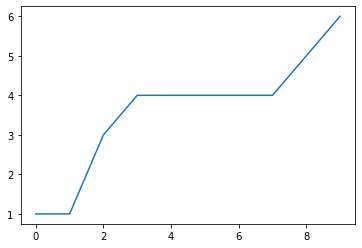

In [3]:
# your code here
dice = throw(10).sort_values(by=0).reset_index()[0]
plt.plot(dice)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([2., 0., 1., 5., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

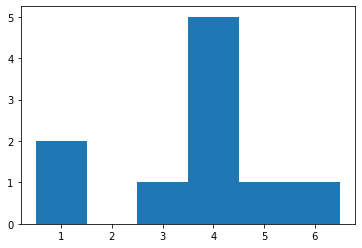

In [4]:
# your code here
plt.hist(dice, bins=6, range=(0.5,6.5))

In [5]:
"""
Both plots indicate the ammount of time each number appeared. In the line plot, the X axis is the iteration
of the loop, the Y axis is the dice number, when we see an horizontal line, it indicates that in
those iterations appeared the same dice number. The bar plot it's much simpler, the X axis is the dice
number and the Y axis the ammount of times that it appeared that value.

The longer the bar or the longer the horizontal line, more times that dice number appeared.

An observation that we can get is if we remove the ".sort_values(by=0)" in the line plot, we can
see in which iteration appeared the dice number.
"""

'\nBoth plots indicate the ammount of time each number appeared. In the line plot, the X axis is the iteration\nof the loop, the Y axis is the dice number, when we see an horizontal line, it indicates that in\nthose iterations appeared the same dice number. The bar plot it\'s much simpler, the X axis is the dice\nnumber and the Y axis the ammount of times that it appeared that value.\n\nThe longer the bar or the longer the horizontal line, more times that dice number appeared.\n\nAn observation that we can get is if we remove the ".sort_values(by=0)" in the line plot, we can\nsee in which iteration appeared the dice number.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean_calculation(x):
    return sum(x)/len(x)
print(mean_calculation(dice))

3.6


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def frequency_dist(x): 
    frequency_dict = {}
    xlist=[number for number in x] #temporary solution to handle series, turns the column to a list
    for n in xlist:
        frequency_dict[n] = xlist.count(n)
    return frequency_dict

mean_calculation(frequency_dist(dice))

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def median_calculation(x):
    if len(x)%2 == 0:
        location1 = int(len(x)/2)
        location2 = location1 - 1
        median = (x[location1] + x[location2])/2
    else:
        location = int((len(x)-1)/2)
        median= x[location]
    return median
        
median_calculation(dice)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quart_calculation(x):
    Q2 = median_calculation(x)
    half1=[]
    half2=[]
    for number in x:
        if number < Q2:
            half1.append(number)
            Q1 = median_calculation(half1)
        elif number > Q2:
            half2.append(number)
            Q3 = median_calculation(half2)
    return Q1,Q2,Q3

quart_calculation(dice)
            

(1, 4.0, 5.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [10]:
# your code here
df = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-understanding-descriptive-stats\data\roll_the_dice_hundred.csv')
df_sorted = df.sort_values(by= 'Unnamed: 0')
#df_sorted.loc[df_sorted['Unnamed: 0'] == df_sorted['roll']]
df_sorted

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [11]:
"""
-if we sort the dataset with any column, we can see that the column Unnamed: 0 and roll match, this mean
they are the same column
"""

'\n-if we sort the dataset with any column, we can see that the column Unnamed: 0 and roll match, this mean\nthey are the same column\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
mean_calculation(df_sorted['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
frequency_dist(df_sorted['value'])

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

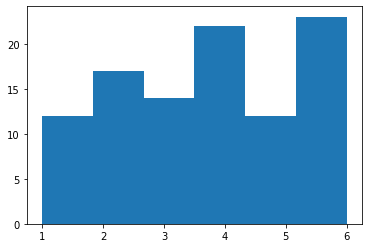

In [14]:
# your code here
plt.hist(df_sorted['value'], bins=6)

In [15]:
"""
The mean value is 3.74 this is really close to 4 and is a frequent value, it is not
exactly 4 since it is levaraged with the number 6, which is the most frequent in the entire set.
"""

'\nThe mean value is 3.74 this is really close to 4 and is a frequent value, it is not\nexactly 4 since it is levaraged with the number 6, which is the most frequent in the entire set.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<BarContainer object of 6 artists>

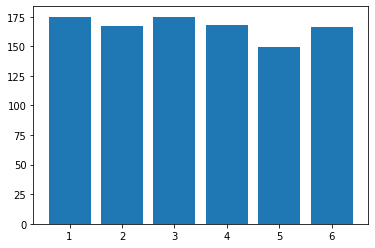

In [16]:
# your code here
df2 = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-understanding-descriptive-stats\data\roll_the_dice_thousand.csv')
dist = frequency_dist(df2['value'])
key= dist.keys()
value= dist.values()
plt.bar(key, value)

In [17]:
"""
"""

'\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [18]:
# your code here
df3= pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population.csv')
frequency_dist(df3['observation'].sort_values())

#I guess the mean will be between 30 and 40 years
#the standard deviation will be between 15 and 20

{1.0: 2,
 2.0: 2,
 4.0: 1,
 5.0: 2,
 6.0: 2,
 7.0: 1,
 8.0: 5,
 9.0: 2,
 10.0: 3,
 11.0: 3,
 12.0: 11,
 13.0: 6,
 14.0: 10,
 15.0: 8,
 16.0: 8,
 17.0: 10,
 18.0: 7,
 19.0: 11,
 20.0: 13,
 21.0: 14,
 22.0: 16,
 23.0: 17,
 24.0: 18,
 25.0: 19,
 26.0: 23,
 27.0: 25,
 28.0: 20,
 29.0: 26,
 30.0: 34,
 31.0: 24,
 32.0: 30,
 33.0: 22,
 34.0: 29,
 35.0: 33,
 36.0: 31,
 37.0: 30,
 38.0: 30,
 39.0: 45,
 40.0: 27,
 41.0: 36,
 42.0: 32,
 43.0: 32,
 44.0: 23,
 45.0: 29,
 46.0: 23,
 47.0: 17,
 48.0: 19,
 49.0: 19,
 50.0: 16,
 51.0: 9,
 52.0: 14,
 53.0: 12,
 54.0: 13,
 55.0: 13,
 56.0: 15,
 57.0: 7,
 58.0: 7,
 59.0: 8,
 60.0: 4,
 61.0: 2,
 62.0: 4,
 63.0: 7,
 64.0: 2,
 65.0: 2,
 66.0: 3,
 67.0: 4,
 68.0: 3,
 69.0: 1,
 70.0: 1,
 71.0: 1,
 73.0: 1,
 82.0: 1}

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
# your code here
print(mean_calculation(df3['observation'])) 
print(df3['observation'].std())

36.56
12.81649962597677


In [20]:
"""
the mean fell in our guess but the standard deviation was not under my estimation
"""

'\nthe mean fell in our guess but the standard deviation was not under my estimation\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

{25.0: 98,
 31.0: 61,
 29.0: 115,
 28.0: 139,
 30.0: 90,
 24.0: 78,
 26.0: 120,
 21.0: 17,
 27.0: 125,
 23.0: 41,
 22.0: 35,
 32.0: 31,
 20.0: 13,
 33.0: 22,
 19.0: 3,
 34.0: 7,
 35.0: 3,
 36.0: 2}

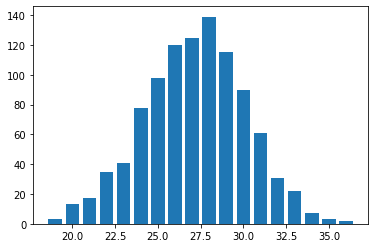

In [21]:
# your code here
df4 = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population2.csv')
dist = frequency_dist(df4['observation'])
keys = dist.keys()
values= dist.values()
plt.bar(keys,values)
dist

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?


yes, the difference is the range of ages between each dataset, the 1st one goes from 1 to 82 and the second one goes from 19 up to 36

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [22]:
# your code here
print(mean_calculation(df4['observation']))
print(df4['observation'].std())

27.155
2.9698139326891835


In [23]:
"""
Here we can see a clear example of what happens when there is a low std and a high std, if we plot the 1st
dataset we can see that the dataset is spread ein a higher range of values, while the 1st one is less spreaded


"""

'\nHere we can see a clear example of what happens when there is a low std and a high std, if we plot the 1st\ndataset we can see that the dataset is spread ein a higher range of values, while the 1st one is less spreaded\n\n\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

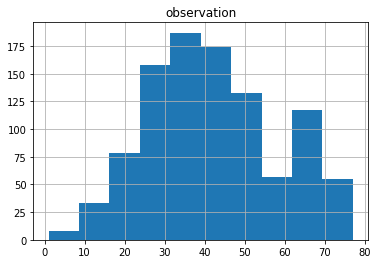

In [24]:
# your code here
df5 = pd.read_csv(r'C:\Users\Sebas!\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population3.csv')
#dist = frequency_dist(df5['observation'])
#plt.figure(figsize= [15.5,10.5])
#plt.bar(dist.keys(),dist.values())
#dist
df5.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [25]:
# your code here
print(mean_calculation(df5['observation']))
print(df5['observation'].std())


41.989
16.14470595986593


In [26]:
"""
-Looking by the 1st curve, we can see that the curve it is wide and not tall, thus we can consider that the
value of the std is high, and moving from 1 std we can expect that:
    -Q1 and Q3 is near by our range of 1 std.
    -68% of our data is between the range of years 26 up to 58 years.

-The most frequent year is 32
-We have another curve that it is from 62 years up to 77 years this makes our mean and std higher
-the coefficient of variation we get 38% 
    
"""

'\n-Looking by the 1st curve, we can see that the curve it is wide and not tall, thus we can consider that the\nvalue of the std is high, and moving from 1 std we can expect that:\n    -Q1 and Q3 is near by our range of 1 std.\n    -68% of our data is between the range of years 26 up to 58 years.\n\n-The most frequent year is 32\n-We have another curve that it is from 62 years up to 77 years this makes our mean and std higher\n-the coefficient of variation we get 38% \n    \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [27]:
# your code here
quart_calculation(df5['observation'])

(29.0, 38.5, 55.0)

In [28]:
"""
This can confirm my previous expectations, the 68% of our data is between the range of 26 and 58, and
half of our data is in the range of 29 up to 55.

The difference between the median and the mean is 3.989.
"""

'\nThis can confirm my previous expectations, the 68% of our data is between the range of 26 and 58, and\nhalf of our data is in the range of 29 up to 55.\n\nThe difference between the median and the mean is 3.989.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [36]:
# your code here
sorted_val = df5['observation'].sort_values(ignore_index=True)
L85 = (len(sorted_val)+1)*0.85 #850.85
sorted_val[851]
P85 = sorted_val[850]+0.85*(sorted_val[851]-sorted_val[850])
P85


64.0

In [30]:
"""

"""

'\n\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [31]:
# your code here

In [32]:
"""
your comments here
"""

'\nyour comments here\n'